In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, recall_score, f1_score, roc_auc_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier

### Read Dataset

In [3]:
patients = pd.read_csv('healthcare-dataset-stroke-data-preprocessed.csv')
patients.sample(5)

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,stroke,is_male,is_urban,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
4682,0.951172,0.0,0.0,1.0,0.116887,0.214204,0.000000,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1666,0.035645,0.0,0.0,0.0,0.010202,0.074456,0.166667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
175,0.877930,1.0,0.0,1.0,0.601837,0.306987,0.000000,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4493,0.682617,0.0,0.0,1.0,0.142877,0.254296,0.666667,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
491,0.731445,0.0,0.0,1.0,0.119380,0.222222,0.500000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


### Functions

In [19]:
def get_k_cross_validation_metrics(clf, X, y, k):
    skf = StratifiedKFold(n_splits=k, shuffle=True)
    cv_results = cross_validate(clf, X, y, cv=skf, scoring = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score),
    'specificity': make_scorer(recall_score,pos_label=0),
    'f1': make_scorer(f1_score),
    'ROC': make_scorer(roc_auc_score),
    })
    return cv_results

In [20]:
def name(cls):
    return cls.__class__.__name__

def get_accuracys(classifiers, X, y, k):
    cls_accs = {name(cls):[] for cls in classifiers}
    for cls in classifiers:
        cv_results = get_k_cross_validation_metrics(cls, X, y, k)
        cls_accs[name(cls)] = cv_results
    return cls_accs

### Model Training

In [21]:
X = patients.drop(["stroke"], axis=1)
y = patients.stroke

In [24]:
k_folds = 10
knn = KNeighborsClassifier(n_neighbors=5)
svc = svm.SVC(probability=True)
adaBoost = AdaBoostClassifier() # default n_estimators=50
classifiers = [knn, svc, adaBoost]
cv_results = get_accuracys(classifiers, X, y, k_folds)

In [41]:
metrics = ['accuracy', 'recall','specificity','f1', 'ROC']
result = pd.DataFrame([], columns=["classifier", *metrics])
for cls, cls_metrics in cv_results.items():
    scores = {metric:cls_metrics['test_' + metric].mean() for metric in metrics}
    scores["classifier"] = cls
    result = result.append(scores, ignore_index=True)
result

,classifier,accuracy,recall,specificity,f1,ROC
0,KNeighborsClassifier,0.947358,0.044167,0.993622,0.075033,0.518894
1,SVC,0.951272,0.000000,1.000000,0.000000,0.500000
2,AdaBoostClassifier,0.950685,0.004000,0.999177,0.007692,0.501589


In [43]:
result.to_excel("PredictResult.xlsx", sheet_name="original", float_format="%.4f", index=False)

In [9]:
def create_plt(cls):
    plt.plot(cv_results[cls] * 100)
    plt.title(f"{cls} Accuracy(%)")
    plt.xlabel("step")
    plt.xticks(range(0, k_folds, 1))
    plt.ylabel("accuracy(%)")
    plt.show()

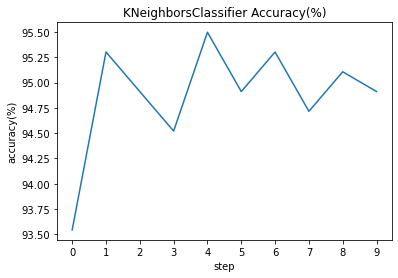

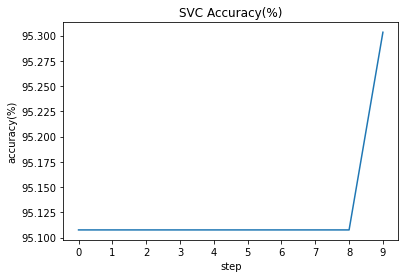

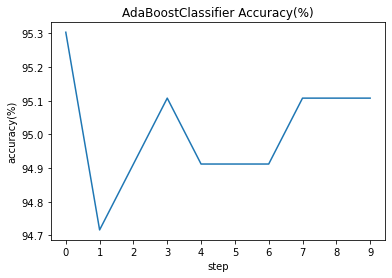

In [10]:
create_plt("KNeighborsClassifier")
create_plt("SVC")
create_plt("AdaBoostClassifier")